# Data Science und Entscheidungsbäume
In dieser Übung werden wir uns mit dem Hidden Markov Model beschäftigen, und auch etwas allgemeiner mit Datenanalyse-Methoden in Python.

## 1. Hidden Markov Models
Für eine Smartwatch soll ein System entwickelt werden, das automatisch erkennt, ob der
Träger gerade schläft. Die Smartwatch enthält einen Beschleunigungssensor, der entwe-
der den Wert wenig Bewegung“ oder den Wert viel Bewegung“ zurückliefert. Wenn der
Träger schläft, ist die Wahrscheinlichkeit für viel Bewegung“ 5 % und die Wahrscheinlichkeit für wenig Bewegung“ 95 %. Wenn der Träger wach ist, ist die Wahrscheinlichkeit
für viel Bewegung“ 60 % und die Wahrscheinlichkeit für wenig Bewegung“ 40 %. Wenn
der Träger schläft, ist die Wahrscheinlichkeit, dass er im nächsten Zeitschritt wach ist,
30 %. Wenn der Träger wach ist, ist die Wahrscheinlichkeit, dass er im nächsten Schritt
schläft, 20 %. Zu Anfang schläft der Träger mit einer Wahrscheinlichkeit von 50 %.

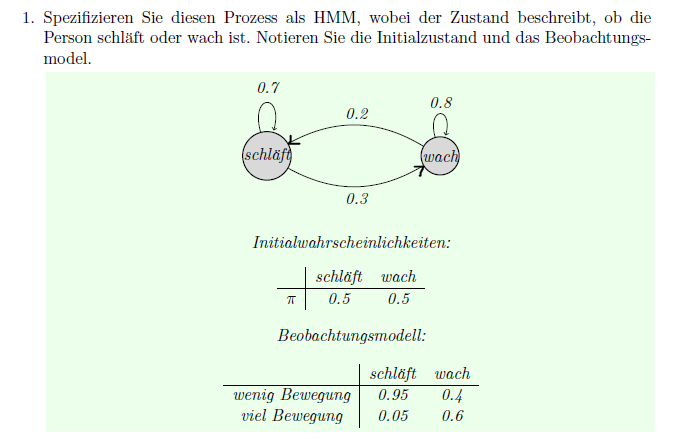
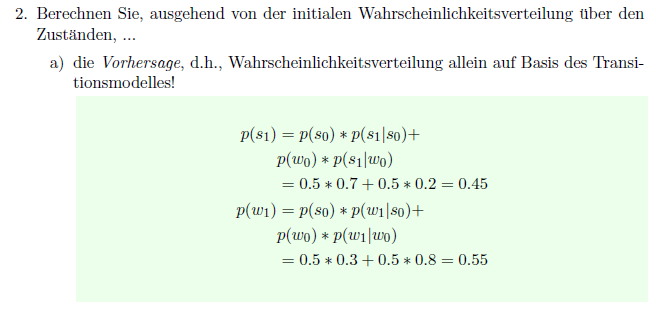
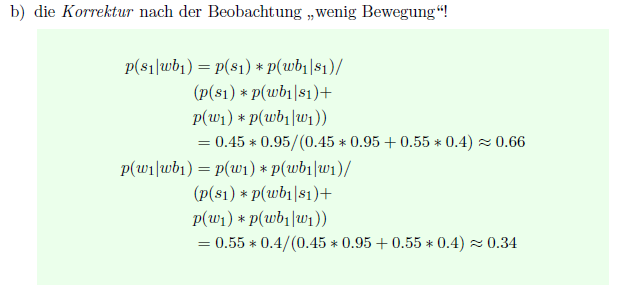

## 2. Pandas

Ein weit verbreitetes Python-Paket für Datenmanagement und -analyse ist `pandas`. Die grundlegende Datenstruktur, die dieses Paket bereitstellt, ist das Data Frame. Ein Data Frame ist eine Tabelle, die im Prinzip so verwendet werden kann wie eine Tabelle in einer relationalen Datenbank, z.B. können Zeilen oder Spalten (oder beides) selektiert werden.

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

data = arff.loadarff('S08.arff')
df = pd.DataFrame(data[0])


#plt.plot(df["Sensor_T8_Acceleration_X"])
df

### Zeilen und Spalten auswählen

Mit pandas können einfach bestimmte Zeilen und Spalten aus dem Data Frame ausgewählt werden. Eine Option besteht darin, Spalten über ihren Namen auszuwählen.


In [ ]:
accx = df.loc[:,"Sensor_T8_Acceleration_X"]
accx

Der `:` steht für "Wähle alle Zeilen". Wenn nur eine einzige Spalte gewählt wird, ist das Ergebnis vom Typ `Series`, ansonsten ist das Ergebnis wieder ein Data Frame. Spalten können auch über ihren Index ausgewählt werden:

In [ ]:
acc = df.iloc[:,1:4]
acc

Äquivalent kann auf die Zeilen zugegriffen werden. Der folgende Ausdruck liefert beispielsweise nur die ersten 5 Zeilen:

In [ ]:
df.iloc[0:5,:]

Natürlich können wir auch beides kombinieren, z.B. so:

In [ ]:
df.loc[0:5,["Sensor_T8_Acceleration_X", "Sensor_T8_Acceleration_Y"]]

Eine andere praktische Möglichkeit besteht darin, Zeilen oder Spalten über Bool'sche Ausdrücke auszuwählen. Der folgende Ausdruck liefert z.B. alle Zeilen, bei denen der Wert von  `Sensor_T8_Acceleration_X` kleiner als 0.7 ist.

In [ ]:
df.loc[df.Sensor_T8_Acceleration_X < 0.7,:]

### Werte Einfügen

Das Einfügen von Werten in ein Data Frame funktioniert genau so. Der folgende Ausdruck setzt alle Werde der Spalte  `Sensor_T8_Acceleration_Y`, die kleiner als 0 sind, auf den Wert 0.

In [ ]:
df.loc[df.Sensor_T8_Acceleration_Y < 0,"Sensor_T8_Acceleration_Y"] = 0
df

### Apply
In vielen Fällen wollen wir eine Funktion auf eine komplette Zeile oder Spalte der Daten anwenden. Die Funktion  `apply` erlaubt uns das. Der folgende Ausdruck berechnet die Mittelwerte pro Spalte:

In [ ]:
df.iloc[:,1:31].apply(np.mean)

## Aufgabe

Wir wollen einige Features auf den Daten berechnen. Für sequentielle Daten werden Features typischerweise Segment-basiert berechnet. Das bedeutet, wir berechnen zunächst eine Feature-Funktion (Mittelwert, ...) für die Zeilen 1 bis n, dann für n+1 bis 2n, usw. Die Segmente können sich auch überlappen. 

Implementieren Sie die Funktion `feature`, die eine gegebene statistische Feature-Funktion (mean, ...) für eine gegebene Fenstergröße, Überlappung und einen gegebenen Datensatz berechnet. Berechnen Sie dann Mittelwert, Median und Varianz der Accelerometerdaten des rechten Fußes mit Segmentlängen von 128, 256 und 512. Benutzen Sie 50% Überlappung und plotten Sie das Ergebnis.



In [ ]:
import matplotlib.pyplot as plt

def feature(wsize,overlap,data,ffunct):
    start = 0
    numwindows = int(len(data)/(wsize-overlap))
    result = np.zeros(numwindows)
    for i in range(numwindows):
        end = start + wsize-1
        windowed = data[start:end]
        result[i] = ffunct(windowed)
        start = start + wsize - overlap
    return(result)

meanX = feature(128,64,df.loc[:,"Sensor_LeftLowerLeg_Acceleration_X"].values,np.mean)
plt.plot(meanX)

Mit Pandas lässt sich die Funktion auch eleganter hinschreiben:

In [ ]:
def feature(window_size, overlap,  data,ffun):
    '''Calculates a rolling window for the variance of a given data frame. The Resulting dataframe is then filtered by the specified overlap'''
    full_frame = data.rolling(window_size).var(ddof=0)
    return full_frame[window_size-1::overlap]

meanX = feature(64,32,df.loc[:,"Sensor_LeftLowerLeg_Acceleration_X"],np.mean)
plt.plot(meanX.values)